# Logical Regression

## Import relevant libaries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load data

In [3]:
raw_data = pd.read_csv("Admittance Logical Regression.csv")
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [7]:
data = raw_data.copy()
data["Admitted"]= data["Admitted"].map({"Yes":1,"No":0})
data

## changes categorical data to numerical by mapping yes to 1, and no to 0

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [8]:
y = data["Admitted"]
x1 = data["SAT"]

## Scatter plot

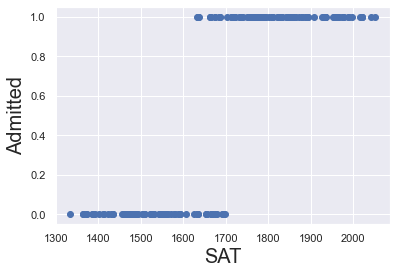

In [11]:
plt.scatter(x1,y,color="C0")
plt.xlabel("SAT",fontsize=20)
plt.ylabel("Admitted",fontsize=20)
plt.show()

## Linear regression

### Plot with a regression line

C:\Users\jackm\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


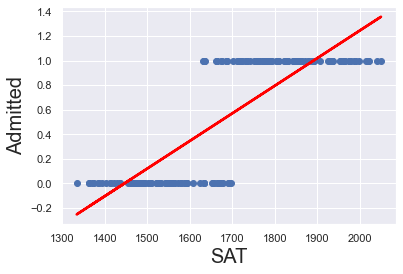

In [22]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y,color = "C0")
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color = "red")
plt.xlabel("SAT",fontsize=20)
plt.ylabel("Admitted",fontsize=20)
plt.show()

In [18]:
## ignore code for rest of lecture, focus on the insights that the plots give us

## Plot with logical regression

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


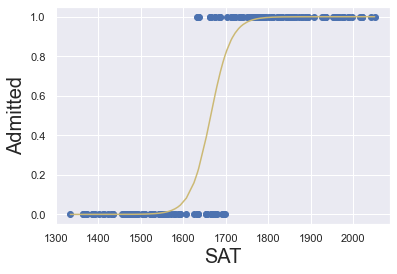

In [25]:
reg_log= sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))


f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color = "C0")
plt.xlabel("SAT",fontsize=20)
plt.ylabel("Admitted",fontsize=20)
plt.plot(x_sorted,f_sorted,color="C8")
plt.show()


In [27]:
## logistical regression curve, tool is logistic regression